In [403]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import KFold, train_test_split
from sklearn import preprocessing, neighbors, tree, naive_bayes, cross_validation
from sklearn.metrics import classification_report, confusion_matrix
import pylab as pyl
%matplotlib inline

## Read and Inspect Data

In [5]:
data = pd.read_csv("data/food.csv", delimiter="\t")

/Users/Jared/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (0,3,5,27,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
data.shape

(79470, 159)

In [154]:
data.columns

Index([u'code', u'url', u'creator', u'created_t', u'created_datetime',
       u'last_modified_t', u'last_modified_datetime', u'product_name',
       u'generic_name', u'quantity',
       ...
       u'caffeine_100g', u'taurine_100g', u'ph_100g',
       u'fruits-vegetables-nuts_100g', u'collagen-meat-protein-ratio_100g',
       u'cocoa_100g', u'chlorophyl_100g', u'carbon-footprint_100g',
       u'nutrition-score-fr_100g', u'nutrition-score-uk_100g'],
      dtype='object', length=159)

In [153]:
pd.options.display.max_columns = 200

In [155]:
data.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0000000024600,http://world-en.openfoodfacts.org/product/0000...,date-limite-app,1434530704,2015-06-17T08:45:04Z,1434535914,2015-06-17T10:11:54Z,Filet de bœuf,NaN,2.46 kg,plastique,plastique,NaN,NaN,Filet de bœuf,fr:filet-de-boeuf,fr:Filet-de-boeuf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",fr:filet-de-boeuf,fr:Filet-de-boeuf,http://en.openfoodfacts.org/images/products/00...,http://en.openfoodfacts.org/images/products/00...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000027205,http://world-en.openfoodfacts.org/product/0000...,tacinte,1458238630,2016-03-17T18:17:10Z,1458238638,2016-03-17T18:17:18Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [9]:
pd.options.display.max_columns = 20

## Data Pre-Processing

### Trim Rows that have almost all null values

In [12]:
nullRowData = data.isnull().sum(axis=1).sort_values()

In [13]:
nullRowData

15042     67
14922     71
66501     72
55360     73
48028     73
53681     74
14983     74
66481     74
38499     75
34738     75
66926     75
14984     75
34739     76
14899     76
39994     76
42306     77
34734     77
23435     77
39977     77
23406     77
66483     77
39273     77
39245     77
51908     78
15007     78
55379     78
66572     78
19401     78
23413     78
2417      79
        ... 
65766    150
65609    150
40717    150
56678    150
71854    150
6752     150
6663     150
6660     150
6659     150
6606     150
6611     150
6613     150
6621     150
6631     150
10419    150
6641     150
6642     150
6643     150
6644     150
6645     150
6646     150
6650     150
58907    150
6651     150
6652     150
6653     150
6657     150
6658     150
6604     150
6722     150
dtype: int64

In [14]:
nullRowDataIndexReset = nullRowData.reset_index(drop=True)

In [15]:
nullRowDataIndexReset

0         67
1         71
2         72
3         73
4         73
5         74
6         74
7         74
8         75
9         75
10        75
11        75
12        76
13        76
14        76
15        77
16        77
17        77
18        77
19        77
20        77
21        77
22        77
23        78
24        78
25        78
26        78
27        78
28        78
29        79
        ... 
79440    150
79441    150
79442    150
79443    150
79444    150
79445    150
79446    150
79447    150
79448    150
79449    150
79450    150
79451    150
79452    150
79453    150
79454    150
79455    150
79456    150
79457    150
79458    150
79459    150
79460    150
79461    150
79462    150
79463    150
79464    150
79465    150
79466    150
79467    150
79468    150
79469    150
dtype: int64

There are 159 columns in the data, so it is clear from the graph below that many rows contain almost all null values.

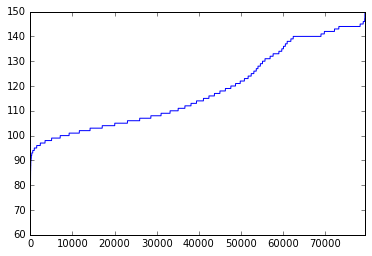

In [16]:
nullRowDataIndexReset.plot()

In [17]:
nullsPerRow = data.isnull().sum(axis=1)

In [18]:
nullsPerRow

0        133
1        144
2        140
3        140
4        139
5        120
6        123
7        135
8        119
9        119
10       141
11       107
12       107
13       140
14       109
15       110
16       111
17       109
18       122
19       144
20       124
21       116
22       134
23       144
24       144
25       113
26       113
27       128
28       136
29       136
        ... 
79440    144
79441    125
79442    144
79443    140
79444    139
79445    144
79446    133
79447    140
79448    144
79449    144
79450    146
79451    140
79452    144
79453    142
79454    143
79455    140
79456    140
79457    123
79458    128
79459    113
79460    123
79461    118
79462    140
79463    144
79464    120
79465    127
79466    110
79467    143
79468    126
79469    132
dtype: int64

In [19]:
dataMinusRows = data[nullsPerRow<120]

In [25]:
dataMinusRows.shape

(47586, 159)

### Trim columns where almost all of the values are null

In [26]:
nullColumnData = dataMinusRows.isnull().sum(axis=0)

In [27]:
print nullColumnData.shape
print nullColumnData[:15]

(159,)
code                          0
url                           0
creator                       1
created_t                     1
created_datetime              1
last_modified_t               0
last_modified_datetime        0
product_name                161
generic_name              12991
quantity                    712
packaging                  1504
packaging_tags             1504
brands                      299
brands_tags                 299
categories                  829
dtype: int64


In [28]:
nullColumnDataSorted = nullColumnData.sort_values()
print nullColumnDataSorted.shape
print nullColumnDataSorted

(159,)
code                                         0
url                                          0
last_modified_t                              0
last_modified_datetime                       0
states_tags                                  0
states                                       0
pnns_groups_2                                0
states_en                                    0
creator                                      1
created_t                                    1
created_datetime                             1
countries_tags                              25
countries_en                                25
countries                                   25
product_name                               161
brands                                     299
brands_tags                                299
quantity                                   712
image_url                                  788
image_small_url                            788
pnns_groups_1                              804
main_c

There are 47586 columns in the data, so it is clear from the graph below that many columns contain almost all null values.

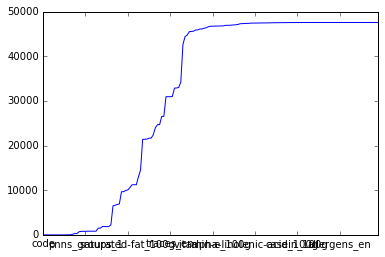

In [29]:
nullColumnDataSorted.plot()

In [212]:
dataMinusRowsAndColumns = dataMinusRows.T[nullColumnData <35000].T

In [213]:
dataMinusRowsAndColumns.shape

(47586, 66)

## Predict Countries that Food is produced in

We attempt to predict which country a food is produced in based on its nutriment makeup. We will use classification methods to do this.

First, look examine the countries field to get a sense for the data

In [214]:
dataMinusRowsAndColumns.countries

8                       France
9               United Kingdom
11                 Royaume-Uni
12              United Kingdom
14                      France
15              United Kingdom
16                      España
17                      France
21                      France
25                     Germany
26                     Germany
33                      France
49       France,United Kingdom
51                      France
55                      France
73                  États-Unis
74          Royaume-Uni,France
86                      France
90              United Kingdom
93               United States
111             United Kingdom
112             United Kingdom
114              United States
115             United Kingdom
117                     France
125              United States
126              United States
127                     France
132             United Kingdom
134                     France
                 ...          
79379              New Zealand
79381   

### Foods produced in multiple countries

In [215]:
producedInMultipleCountries = np.sum(dataMinusRowsAndColumns.countries_en.str.contains(","))
producedInMultipleCountries

1351

In [216]:
producedInCountriesCount = dataMinusRowsAndColumns.countries_en.str.count(",")
sortedProducedInCountriesCount = producedInCountriesCount.sort_values().reset_index(drop=True)

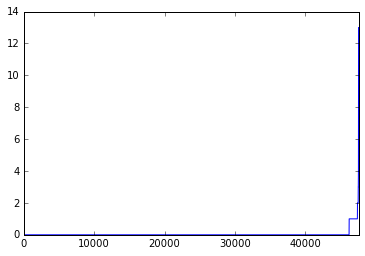

In [217]:
sortedProducedInCountriesCount.plot()

Some foods are produced in multiple countries. You can see in the graph above, that this is true for a small percentage of the data. For simplicity, we will remove these rows from our analysis.

In [218]:
producedInOneCountry = dataMinusRowsAndColumns.countries_en.str.contains(",") == False
print producedInOneCountry.shape
print producedInOneCountry.head()

(47586,)
8     True
9     True
11    True
12    True
14    True
Name: countries_en, dtype: bool


In [219]:
singleCountryData = dataMinusRowsAndColumns[producedInOneCountry]
print singleCountryData.shape

(46210, 66)


### Rocchio Method

In [226]:
#We will only use the numberic collumns that have to do with nutriment values for this prediction
singleCountryData.columns[55:]

Index([u'energy_100g', u'fat_100g', u'saturated-fat_100g',
       u'carbohydrates_100g', u'sugars_100g', u'fiber_100g', u'proteins_100g',
       u'salt_100g', u'sodium_100g', u'nutrition-score-fr_100g',
       u'nutrition-score-uk_100g'],
      dtype='object')

In [233]:
countriesRecords = singleCountryData.iloc[:,55:]
print countriesRecords.shape

(46210, 11)


In [234]:
countriesTarget = singleCountryData.countries_en
print countriesTarget.shape

(46210,)


Now deal with the null values by using the mean

In [265]:
numCols = countriesRecords.shape[1]
for i in range(numCols):
    currMean = countriesRecordsCopy.iloc[:,i].mean()
    countriesRecords.iloc[:,i].fillna(currMean, axis=0, inplace=True)

In [266]:
countriesRecords.head()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
8,1083.16219,13.147361,5.218562,27.647402,12.694918,2.82028,7.515199,1.100207,0.432134,8.044746,7.780121
9,1083.16219,13.147361,5.218562,27.647402,12.694918,2.82028,7.515199,1.100207,0.432134,8.044746,7.780121
11,1284.00000,7.000000,3.600000,54.200000,44.000000,4.70000,3.900000,0.200000,0.078740,10.000000,10.000000
12,1284.00000,7.000000,3.600000,54.200000,44.000000,4.70000,3.900000,0.199898,0.078700,10.000000,10.000000
14,177.00000,0.000000,0.000000,10.400000,10.400000,0.00000,0.000000,0.025400,0.010000,13.000000,2.000000


In [360]:
#define a function for normalization
def normalizeMatrix(df):
    return (df - df.min()) / float((df.max() - df.min()))

In [269]:
countriesRecords_norm = normalizeMatrix(countriesRecords)

In [271]:
print countriesRecords_norm.shape
print countriesTarget.shape

(46210, 11)
(46210,)


In [276]:
x_train, x_test, y_train, y_test = train_test_split(countriesRecords_norm, countriesTarget, test_size=0.2, random_state=33)
print x_train.shape
print y_train.shape
print x_test.shape
print y_test.shape

(36968, 11)
(36968,)
(9242, 11)
(9242,)


In [332]:
def getPrototypeVectors(records, labels):
    classesDict = {}
    countDict = {}
    for i in labels.unique():
        classesDict[i] = np.zeros(records.shape[1])
        countDict[i] = 0
    for i in range(len(records)):
        currClass = labels.iloc[i]
        countDict[currClass] += 1
        classesDict[currClass] = classesDict[currClass] + records.iloc[i]
    for key,value in countDict.iteritems():
        classesDict[key] = classesDict[key] / value
    return classesDict

In [335]:
#define a function to calculate the distance between two vectors using cosine similarity
def calcCosineSimilarity(x1, x2):
    x1Norm = np.linalg.norm(x1)
    x2Norm = np.linalg.norm(x2)
    sims = np.dot(x1,x2) / (x1Norm * x2Norm)
    return sims

In [336]:
def testRocchio(test_set, classesDict):
    classifications = []
    for i in range(len(test_set)):
        currTest = test_set.iloc[i]
        maxSimilarity = -2
        classPredicion = ''
        for key, value in classesDict.iteritems():
            cosSimilarity = calcCosineSimilarity(value, currTest)
            if (cosSimilarity > maxSimilarity):
                maxSimilarity = cosSimilarity
                classPrediction = key
        classifications.append(classPrediction)
    return classifications    

In [338]:
def calculateRocchioCorrectness(classifications, real_labels):
    correctNumber = 0
    totalNumber = 0
    for i in range(len(classifications)):
        print ("predict: " + classifications[i])
        print ("real: " + real_labels.iloc[i])
        if classifications[i] == real_labels.iloc[i]:
            correctNumber += 1
        totalNumber += 1
    percentCorrect = float(correctNumber) / totalNumber
    return percentCorrect

In [368]:
prototypeVectors = getPrototypeVectors(x_train, y_train)

In [369]:
print prototypeVectors

{'Brazil': energy_100g                0.009180
fat_100g                   0.120532
saturated-fat_100g         0.056006
carbohydrates_100g         0.260546
sugars_100g                0.147677
fiber_100g                 0.044030
proteins_100g              0.075983
salt_100g                  0.018647
sodium_100g                0.018689
nutrition-score-fr_100g    0.460336
nutrition-score-uk_100g    0.475639
dtype: float64, 'Canada': energy_100g                0.006946
fat_100g                   0.099481
saturated-fat_100g         0.046570
carbohydrates_100g         0.172193
sugars_100g                0.151529
fiber_100g                 0.029313
proteins_100g              0.070222
salt_100g                  0.006737
sodium_100g                0.006747
nutrition-score-fr_100g    0.417159
nutrition-score-uk_100g    0.431490
dtype: float64, 'Qatar': energy_100g                0.005770
fat_100g                   0.230737
saturated-fat_100g         0.052186
carbohydrates_100g         0.088236
su

In [370]:
test_classifications = testRocchio(x_test, prototypeVectors)
test_classifications[:5]

['Qatar', 'Slovenia', 'Aruba', 'Kenya', 'Slovakia']

In [371]:
correct_test_percent = calculateRocchioCorrectness(test_classifications, y_test)

predict: Qatar
real: France
predict: Slovenia
real: France
predict: Aruba
real: France
predict: Kenya
real: Germany
predict: Slovakia
real: France
predict: Luxembourg
real: France
predict: Czech Republic
real: France
predict: Other-turquie
real: United States
predict: Lebanon
real: Cambodia
predict: Luxembourg
real: France
predict: French Polynesia
real: France
predict: Virgin Islands of the United States
real: France
predict: French Polynesia
real: Switzerland
predict: Other-turquie
real: Spain
predict: Sweden
real: France
predict: United Arab Emirates
real: France
predict: Malta
real: France
predict: French Guiana
real: France
predict: French Polynesia
real: France
predict: South Korea
real: Spain
predict: Japan
real: France
predict: Philippines
real: France
predict: Lebanon
real: Germany
predict: Czech Republic
real: France
predict: Czech Republic
real: France
predict: New Caledonia
real: France
predict: Luxembourg
real: France
predict: Kenya
real: Germany
predict: Tunisia
real: Fra

In [372]:
correct_test_percent

0.0006492101276779918

In [373]:
train_classifications = testRocchio(x_train, prototypeVectors)
train_classifications[:5]

['Norway', 'Kenya', 'India', 'Czech Republic', 'Venezuela']

In [374]:
correct_train_percent = calculateRocchioCorrectness(test_classifications, y_train)

predict: Qatar
real: France
predict: Slovenia
real: France
predict: Aruba
real: France
predict: Kenya
real: Germany
predict: Slovakia
real: France
predict: Luxembourg
real: France
predict: Czech Republic
real: France
predict: Other-turquie
real: Italy
predict: Lebanon
real: France
predict: Luxembourg
real: France
predict: French Polynesia
real: Spain
predict: Virgin Islands of the United States
real: France
predict: French Polynesia
real: France
predict: Other-turquie
real: France
predict: Sweden
real: Germany
predict: United Arab Emirates
real: France
predict: Malta
real: France
predict: French Guiana
real: France
predict: French Polynesia
real: France
predict: South Korea
real: France
predict: Japan
real: France
predict: Philippines
real: France
predict: Lebanon
real: Switzerland
predict: Czech Republic
real: Austria
predict: Czech Republic
real: France
predict: New Caledonia
real: France
predict: Luxembourg
real: France
predict: Kenya
real: France
predict: Tunisia
real: France
predi

In [375]:
correct_train_percent

0.0003246050638389959

In [345]:
y_test.value_counts()

France                       6828
Spain                         677
Germany                       511
United States                 281
United Kingdom                272
Switzerland                   156
Belgium                       119
Australia                      95
Portugal                       69
Italy                          47
Guadeloupe                     15
Austria                        13
Brazil                         13
Russia                         11
New Zealand                    10
Saint Pierre and Miquelon      10
Netherlands                     9
Tunisia                         9
Canada                          9
French Guiana                   8
Réunion                         7
Poland                          5
Mexico                          5
Sweden                          4
Senegal                         4
Cambodia                        3
New Caledonia                   3
Romania                         3
fr:Quebec                       3
Hong Kong     

In [361]:
a = np.array([3,4,5])
b = np.array([3,4,6])
c = np.array([55,12,1])

In [362]:
a_norm = normalizeMatrix(a)
b_norm = normalizeMatrix(b)
c_norm = normalizeMatrix(c)

In [363]:
c_norm

array([ 1.       ,  0.2037037,  0.       ])

In [364]:
calcCosineSimilarity(a,b)

0.99589320646770385

In [365]:
calcCosineSimilarity(b,c)

0.49802319053327371

In [366]:
calcCosineSimilarity(a_norm, b_norm)

0.98994949366116658

In [367]:
calcCosineSimilarity(b_norm, c_norm)

0.063120479475416325

### KNN

In [377]:
X_train, X_test, Y_train, Y_test = train_test_split(countriesRecords, countriesTarget, test_size=0.2, random_state=33)

In [381]:
#normalize the data
min_max_scaler = preprocessing.MinMaxScaler().fit(X_train)
train_norm = min_max_scaler.transform(X_train)
test_norm = min_max_scaler.transform(X_test)

In [388]:
#create a scikit-learn KNN classifier. I tried a number of different values for K with both weight parameters. 
#Discussion of findings at the end of this section
n_neighbors = 10
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(train_norm, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='distance')

In [389]:
knnpreds_test = knnclf.predict(test_norm)
knnpreds_test

array(['France', 'France', 'France', ..., 'France', 'France', 'France'], dtype=object)

In [395]:
#calculate the average accuracy score for the test data
print knnclf.score(test_norm, Y_test)

0.75871023588


In [396]:
#calculate the average accuracy score for the training data
print knnclf.score(train_norm, Y_train)

0.961642501623


In [399]:
#Generate the confusion matrix
knncm = (confusion_matrix(Y_test, knnpreds_test))
print knncm

[[ 0  0  0 ...,  0  0  0]
 [ 0  0  0 ...,  0  0  0]
 [ 0  0  4 ...,  0  1  0]
 ..., 
 [ 0  0  0 ..., 54  2  0]
 [ 0  0  0 ...,  2 62  0]
 [ 0  0  0 ...,  0  0  0]]


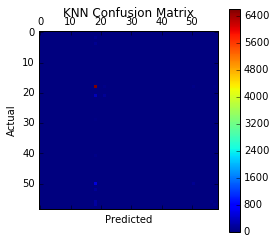

In [404]:
#visualize the confusion matrix
%matplotlib inline
pyl.matshow(knncm)
pyl.title('KNN Confusion Matrix')
pyl.colorbar()
pyl.ylabel('Actual')
pyl.xlabel('Predicted')
pyl.show()

In [402]:
#print the classification report
print(classification_report(Y_test, knnpreds_test))

             precision    recall  f1-score   support

    Algeria       0.00      0.00      0.00         1
  Argentina       0.00      0.00      0.00         2
  Australia       0.44      0.04      0.08        95
    Austria       0.50      0.08      0.13        13
    Belgium       0.06      0.01      0.01       119
     Brazil       0.33      0.08      0.12        13
   Bulgaria       0.00      0.00      0.00         2
Burkina Faso       0.00      0.00      0.00         1
   Cambodia       0.00      0.00      0.00         3
     Canada       0.00      0.00      0.00         9
      Chile       0.00      0.00      0.00         2
      China       0.00      0.00      0.00         2
       Cuba       0.00      0.00      0.00         2
Czech Republic       0.00      0.00      0.00         2
Côte d'Ivoire       0.00      0.00      0.00         1
    Denmark       0.00      0.00      0.00         2
European Union       0.00      0.00      0.00         2
    Finland       0.00      0.00    

/Users/Jared/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
